# Influence of Parents Education Level on Childrens Schooling Performance
## by Daniel Stenberg

## Investigation Overview

Using the PISA study dataset from 2012, this investigation is focused on how the schooling performance of children is associated with the educational levels of their parents.


## Dataset Overview

The dataset that was used for this investigation consisted of the following variables:

* Nationality
* Educational levels of each parent (mother and father) as defined by the ISCED levels (0-6)
* PISA scores for math, reading and science

These variables were recorded for almost 500,000 students from 68 countries.

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [5]:
# load in the dataset into a pandas dataframe
# CNT = Country code
# OECD = OECD country (yes/no)
# ST03Q02 = Year of birth
# ST13Q01 = Mother highest schooling (up to level 3)
# ST17Q01 = Father highest schooling (up to level 3)
# PV1MATH = Plausible value math
# PV1READ = Plausible value reading
# PV1SCIE = Plausible value science
# ST14Q04 = Mother level 4 schooling yes/no
# ST14Q03 - Mother level 5A schooling yes/no
# ST14Q02 - Mother level 5B schooling yes/no
# ST14Q01 - Mother level 56 schooling yes/no
# ST18Q04 = Father level 4 schooling yes/no
# ST18Q03 - Father level 5A schooling yes/no
# ST18Q02 - Father level 5B schooling yes/no
# ST18Q01 - Father level 56 schooling yes/no
usecols = ['CNT', 'OECD', 'ST03Q02', 'ST13Q01', 'ST17Q01', 'PV1MATH', 'PV1READ', 'PV1SCIE', 'ST14Q04', 'ST14Q03', 'ST14Q02', \
           'ST14Q01', 'ST18Q04', 'ST18Q03', 'ST18Q02', 'ST18Q01']

df = pd.read_csv('pisa2012.csv', usecols=usecols, encoding='latin-1')

# Rename the columns to something more user-friendly
new_col_names = {
    'CNT': 'country',
    'OECD': 'is_oecd_country',
    'ST03Q02': 'year_of_birth',
    'ST13Q01': 'mother_schooling',
    'ST17Q01': 'father_schooling',
    'PV1MATH': 'math_score',
    'PV1READ': 'reading_score',
    'PV1SCIE': 'science_score',
    'ST14Q04': 'mother_schooling_level4',
    'ST14Q03': 'mother_schooling_level5A',
    'ST14Q02': 'mother_schooling_level5B',
    'ST14Q01': 'mother_schooling_level6',
    'ST18Q04': 'father_schooling_level4',
    'ST18Q03': 'father_schooling_level5A',
    'ST18Q02': 'father_schooling_level5B',
    'ST18Q01': 'father_schooling_level6',
}

df = df.rename(columns=new_col_names)

# Wrangle ISCED levels to single columns for highest level
df['mother_isced_level'] = 0
df.loc[df['mother_schooling'] == "<ISCED level 1> ", 'mother_isced_level'] = 1
df.loc[df['mother_schooling'] == "<ISCED level 2> ", 'mother_isced_level'] = 2
df.loc[df['mother_schooling'] == "<ISCED level 3A> ", 'mother_isced_level'] = 3
df.loc[df['mother_schooling'] == "<ISCED level 3B> ", 'mother_isced_level'] = 3
df.loc[df['mother_schooling_level4'] == "Yes", 'mother_isced_level'] = 4
df.loc[df['mother_schooling_level5A'] == "Yes", 'mother_isced_level'] = 5
df.loc[df['mother_schooling_level5B'] == "Yes", 'mother_isced_level'] = 5
df.loc[df['mother_schooling_level6'] == "Yes", 'mother_isced_level'] = 6
df = df.drop(columns=['mother_schooling', 'mother_schooling_level4', 'mother_schooling_level5A', 'mother_schooling_level5B', 'mother_schooling_level6'])

df['father_isced_level'] = 0
df.loc[df['father_schooling'] == "<ISCED level 1> ", 'father_isced_level'] = 1
df.loc[df['father_schooling'] == "<ISCED level 2> ", 'father_isced_level'] = 2
df.loc[df['father_schooling'] == "<ISCED level 3A> ", 'father_isced_level'] = 3
df.loc[df['father_schooling'] == "<ISCED level 3B> ", 'father_isced_level'] = 3
df.loc[df['father_schooling_level4'] == "Yes", 'father_isced_level'] = 4
df.loc[df['father_schooling_level5A'] == "Yes", 'father_isced_level'] = 5
df.loc[df['father_schooling_level5B'] == "Yes", 'father_isced_level'] = 5
df.loc[df['father_schooling_level6'] == "Yes", 'father_isced_level'] = 6
df = df.drop(columns=['father_schooling', 'father_schooling_level4', 'father_schooling_level5A', 'father_schooling_level5B', 'father_schooling_level6'])

# Create mean PISA score variable
df['mean_score'] = (df['math_score'] + df['reading_score'] + df['science_score'])/3

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Educational Levels of Mothers and Fathers

Let's start by taking a look at the ISCED levels of mothers and fathers of the PISA study children.

Note that:
* Level 5 is most common
* Level 0 is the second most common among fathers

The mean level of mothers is 3.16. The mean level of fathers is 3.05.

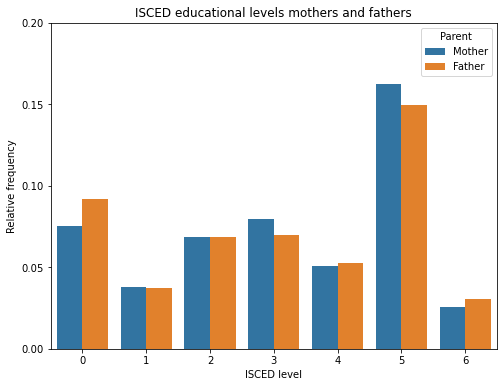

In [7]:
df_plot_mothers = df.drop(columns=['father_isced_level'])
df_plot_mothers['parent'] = "Mother"
df_plot_mothers = df_plot_mothers.rename(columns={'mother_isced_level': "isced_level"})
df_plot_fathers = df.drop(columns=['mother_isced_level'])
df_plot_fathers['parent'] = "Father"
df_plot_fathers = df_plot_fathers.rename(columns={'father_isced_level': "isced_level"})
df_plot_parents = pd.concat([df_plot_mothers, df_plot_fathers])
df_plot_parents.head()

type_counts = df_plot_parents['isced_level'].value_counts()
total = df_plot_parents['isced_level'].value_counts().sum()
tick_props = np.arange(0, 0.25, 0.05)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

plt.figure(figsize=(8,6))
sb.countplot(data=df_plot_parents, x='isced_level', hue='parent');
plt.legend(title="Parent");
plt.xlabel("ISCED level");
plt.ylabel("Relative frequency");
plt.yticks(tick_props * total, tick_names);
plt.title("ISCED educational levels mothers and fathers");

## Correlation to PISA scores - Mothers and Fathers Separate

In the plots below the relationship from mothers and fathers ISCED levels are respectively correlated with the mean PISA subject score.

In the plot, the median and quartiles are marked for each violin distribution diagram.

Some interesting things to note:
* PISA score generally increasing with parent ISCED levels
* There is a high variance, especially for parent ISCED level 6 (highest)
* Parents with lowest ISCED level (0) seem to correlate with slightly higher PISA score than level 1 parents

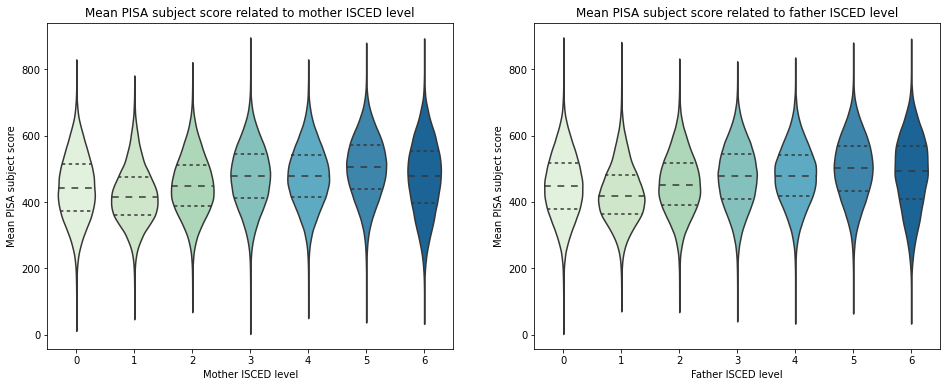

In [16]:
plt.figure(figsize=(16,6))

plt.subplot(1, 2, 1)

base_color = sb.color_palette()[0]
sb.violinplot(data=df, x='mother_isced_level', y='mean_score', inner='quartile', palette="GnBu");
plt.title("Mean PISA subject score related to mother ISCED level")
plt.xlabel("Mother ISCED level");
plt.ylabel("Mean PISA subject score");

plt.subplot(1, 2, 2)

sb.violinplot(data=df, x='father_isced_level', y='mean_score', inner='quartile', palette="GnBu");
plt.title("Mean PISA subject score related to father ISCED level")
plt.xlabel("Father ISCED level");
plt.ylabel("Mean PISA subject score");

## Correlation to PISA scores - Mothers and Fathers Together
In the heat map below, ISCED levels of mothers and fathers are compared with mean PISA scores (subject average) in the same diagram, revealing some interesting findings:

* Some of the highest PISA scores are correlated with mother with ISCED level 5
* The lowest scores are correlated with one parent having a level 6 ISCED and the other at level 1
 * Especially visible for mother with level 1 ISCED

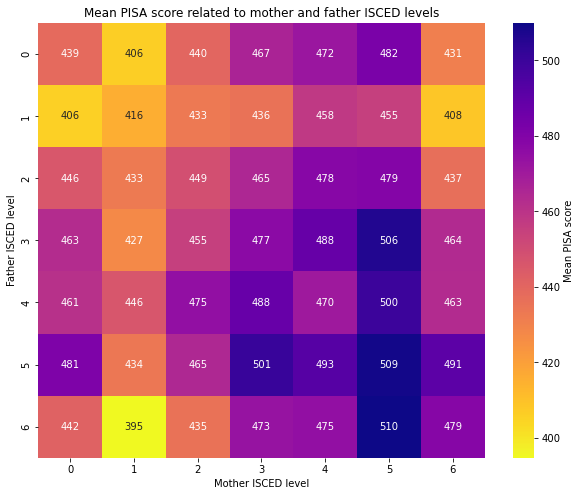

In [18]:
cat_means = df.groupby(['mother_isced_level', 'father_isced_level']).mean()['mean_score']
cat_means = cat_means.reset_index(name = 'mean_score_avg')
cat_means = cat_means.pivot(index = 'father_isced_level', columns = 'mother_isced_level', values = 'mean_score_avg')

plt.figure(figsize=(10,8))
sb.heatmap(cat_means, annot = True, fmt='.0f', cmap='plasma_r', cbar_kws = {'label' : 'Mean PISA score'})
plt.xlabel("Mother ISCED level")
plt.ylabel("Father ISCED level")
plt.title("Mean PISA score related to mother and father ISCED levels");